In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import torch

import os
import sys

from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

In [2]:
from ast import literal_eval

In [3]:
sys.path.append('C:\\Users\\andre\\PycharmProjects\\AdClassificationProject')
import src

In [4]:
model_path = '../models/nnets/nnet_train.pt'
data_folder_path = '../data/processed/test'

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [6]:
with open(model_path, 'rb') as file:
    clf = torch.load(file, map_location=device)

In [10]:
def analyse_thresholds(label):
    df = pd.read_csv(os.path.join(data_folder_path, label + '.csv'))
    df['texts'] = df['texts'].apply(literal_eval)
    
    res = clf.predict_probas(list(df['texts']))
    probas = res[label][:, 1]
    
    p, r, thresholds = precision_recall_curve(df['labels'], probas)
    t = np.concatenate((thresholds, np.array([1])))

    plt.figure()
    plt.plot(p, r)
    plt.grid()
    plt.xlabel('Precision')
    plt.ylabel('Recall')

    plt.figure()
    plt.plot(t, 2 * p * r / (p + r))
    plt.grid()
    plt.xlabel('Threshold')
    plt.ylabel('F-score')
    
    plt.figure()
    plt.plot(t, p)
    plt.grid()
    plt.xlabel('Threshold')
    plt.ylabel('Precision')
               
    plt.figure()
    plt.plot(t, r)
    plt.grid()
    plt.xlabel('Threshold')
    plt.ylabel('Recall')
    
    t = thresholds[np.argmax( 2 * p * r / (p + r))]
    print(f't = {t}')

In [11]:
label = 'nationality'
df = pd.read_csv(os.path.join(data_folder_path, label + '.csv'))
df['texts'] = df['texts'].apply(literal_eval)

In [21]:
%%time
res = clf.predict_probas(list(df['texts'][0]))

RuntimeError: input must have 3 dimensions, got 5

In [20]:
[df['texts'][0]]

[['квартира',
  'ремонт',
  'окно',
  'двор',
  'комната',
  'смежный',
  'изолировать',
  'комиссия',
  '0',
  '%.',
  'коммунальный',
  'платёж']]

In [17]:
probas = res[label][:, 1]

In [18]:
probas

array([0.54897565, 0.41096678, 0.2282395 , 0.26847878, 0.35756993,
       0.2521046 , 0.5098031 , 0.24867184, 0.06601276, 0.13880898,
       0.42900494, 0.2776406 ], dtype=float32)

# Nationality

C:\Users\andre\PycharmProjects\AdClassificationProject\venv\lib\site-packages\transformers\tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
C:\Users\andre\PycharmProjects\AdClassificationProject\src\models\models_utils.py:589: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probas[pred_prob_label] = F.softmax(pred_probas[pred_prob_label]).\


t = 0.7494738698005676
CPU times: total: 2h 15min 45s
Wall time: 1h 14min 37s


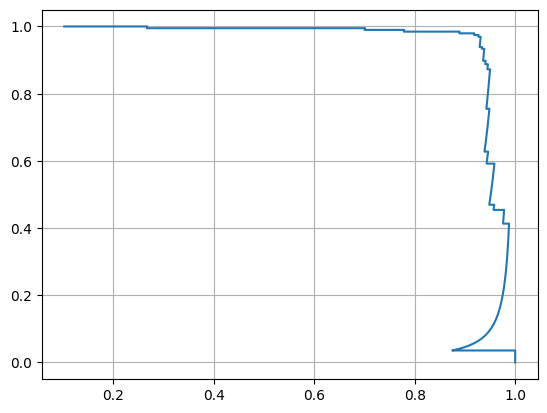

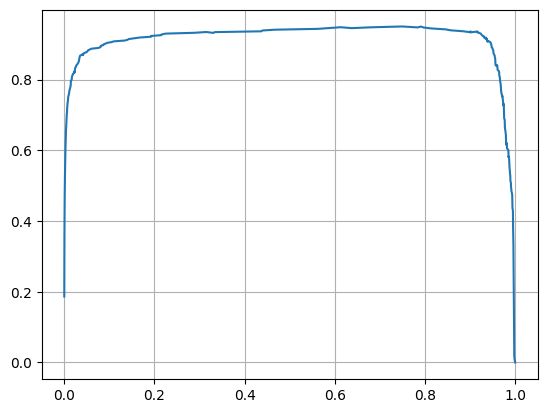

In [9]:
%%time
analyse_thresholds('nationality')

C:\Users\andre\PycharmProjects\AdClassificationProject\venv\lib\site-packages\transformers\tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
C:\Users\andre\PycharmProjects\AdClassificationProject\src\models\models_utils.py:589: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probas[pred_prob_label] = F.softmax(pred_probas[pred_prob_label]).\
C:\Users\andre\AppData\Local\Temp\ipykernel_11476\1833851849.py:16: RuntimeWarning: invalid value encountered in divide
  2 * p * r / (p + r))
C:\Users

t = 0.9700471758842468
CPU times: total: 1h 55min 22s
Wall time: 57min 52s


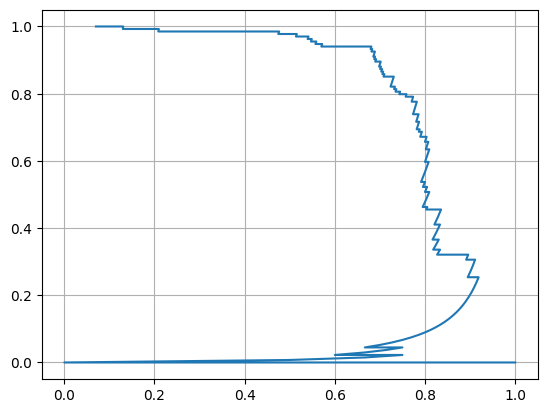

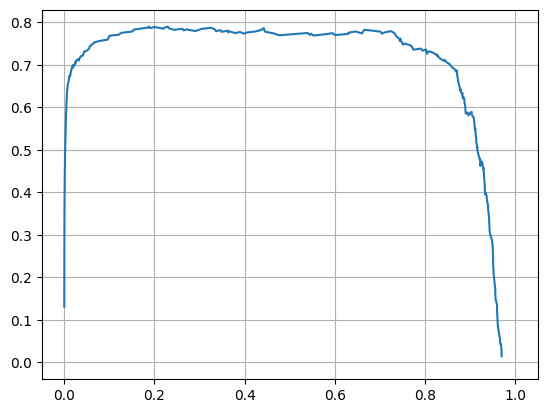

In [10]:
%%time
analyse_thresholds('families')

C:\Users\andre\PycharmProjects\AdClassificationProject\venv\lib\site-packages\transformers\tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
C:\Users\andre\PycharmProjects\AdClassificationProject\src\models\models_utils.py:589: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probas[pred_prob_label] = F.softmax(pred_probas[pred_prob_label]).\


t = 0.2543890178203583
CPU times: total: 1h 55min 46s
Wall time: 58min 3s


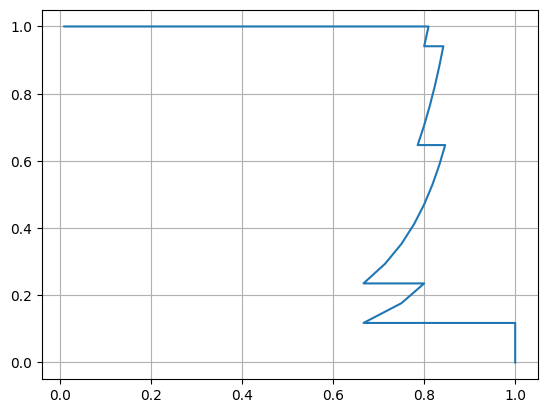

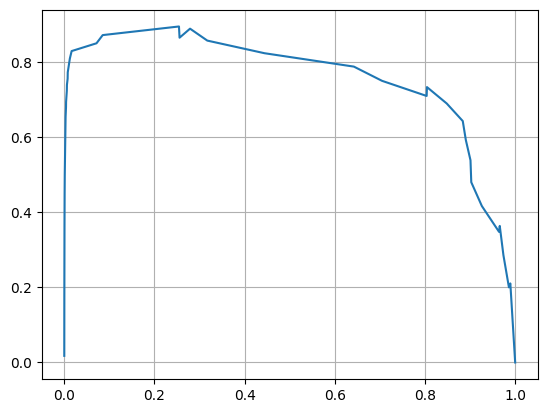

In [11]:
%%time
analyse_thresholds('sex')

C:\Users\andre\PycharmProjects\AdClassificationProject\venv\lib\site-packages\transformers\tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
C:\Users\andre\PycharmProjects\AdClassificationProject\src\models\models_utils.py:589: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probas[pred_prob_label] = F.softmax(pred_probas[pred_prob_label]).\


t = 0.42462095618247986
CPU times: total: 1h 54min 43s
Wall time: 57min 28s


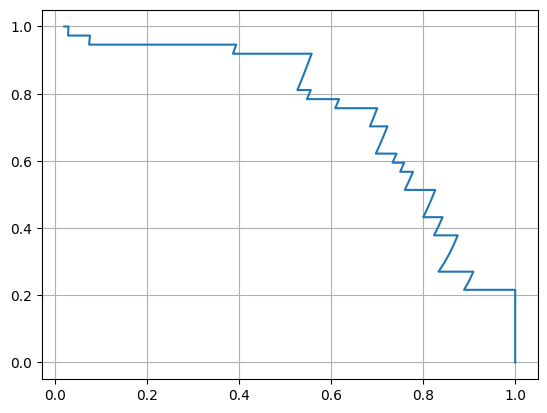

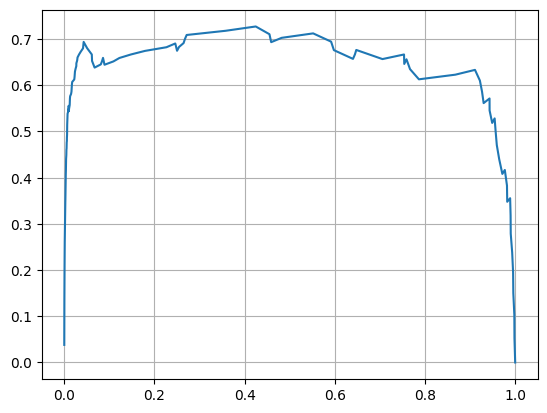

In [12]:
%%time
analyse_thresholds('limit')

In [12]:
pd.concat((df['labels'], df['labels']), axis=1)

,labels,labels
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
1901,0,0
1902,0,0
1903,0,0
1904,0,0


In [9]:
tokens = [['квартира', 'сдаваться', 'славянин']]
for i in clf.batch_generator(tokens):
    print(i, len(i))

{'tokens': tensor([[  101, 15511, 49237, 17790,  1303,   102,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     

In [10]:
tokens[0:]

[['квартира', 'сдаваться', 'славянин']]

In [11]:
clf.predict_probas(tokens[0:])

{'nationality': array([[0.04176566, 0.95823437]], dtype=float32),
 'families': array([[0.96891207, 0.031088  ]], dtype=float32),
 'sex': array([[9.9958009e-01, 4.1993643e-04]], dtype=float32),
 'limit': array([[0.9314715 , 0.06852852]], dtype=float32)}

In [7]:
tokens = [['квартира', 'сдаваться', 'славянин'], ['девушка', 'женщина', '1']]
for i in clf.batch_generator(tokens):
    print(i)

{'tokens': tensor([[  101, 15511, 49237,  ...,     0,     0,     0],
        [  101,  6032,  5615,  ...,     0,     0,     0]]), 'mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'tokens_rnn': tensor([[  1447,  41840, 294776],
        [  1438,   1373,     37]], dtype=torch.int32)}


C:\Users\andre\PycharmProjects\AdClassificationProject\venv\lib\site-packages\transformers\tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [8]:
clf.predict_probas(tokens[0:])

C:\Users\andre\PycharmProjects\AdClassificationProject\src\models\models_utils.py:592: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probas[pred_prob_label] = F.softmax(pred_probas[pred_prob_label]).\


{'nationality': array([[0.04176566, 0.95823437],
        [0.9186323 , 0.08136764]], dtype=float32),
 'families': array([[0.96891207, 0.031088  ],
        [0.9279133 , 0.07208668]], dtype=float32),
 'sex': array([[9.9958009e-01, 4.1993643e-04],
        [4.8483831e-01, 5.1516163e-01]], dtype=float32),
 'limit': array([[0.9314715 , 0.0685285 ],
        [0.96988845, 0.03011152]], dtype=float32)}

In [14]:
tokens = [['квартира', 'сдаваться', 'славянин'], ['девушка', 'женщина', '1'], ['рф']]

In [15]:
clf.predict_probas(tokens[0:])

{'nationality': array([[0.04176566, 0.95823437],
        [0.9186323 , 0.08136764],
        [0.42055938, 0.5794407 ]], dtype=float32),
 'families': array([[0.96891207, 0.031088  ],
        [0.9279133 , 0.07208668],
        [0.95288265, 0.04711733]], dtype=float32),
 'sex': array([[9.9958009e-01, 4.1993643e-04],
        [4.8483831e-01, 5.1516163e-01],
        [9.8657507e-01, 1.3424991e-02]], dtype=float32),
 'limit': array([[0.9314715 , 0.06852848],
        [0.96988845, 0.03011152],
        [0.99673307, 0.00326699]], dtype=float32)}